### Importing Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [2]:
df = pd.read_csv('rainfall.csv')

In [3]:
df 

,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,Paro,2000,1,9.500000,-0.400000,65.000000,0.260000,0.0
1,Paro,2000,2,10.600000,2.000000,65.000000,0.520000,0.0
2,Paro,2000,3,14.500000,4.000000,69.000000,0.520000,11.0
3,Paro,2000,4,19.600000,8.700000,77.000000,0.420000,23.4
4,Paro,2000,5,22.500000,10.200000,77.000000,0.240000,98.4
...,...,...,...,...,...,...,...,...
2634,Tashiyangtse,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,Tashiyangtse,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,Tashiyangtse,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,Tashiyangtse,2021,11,20.050000,6.266667,75.666667,0.328333,9.0


,location,Year,Month,Tmax,Tmin,RH,Wind Speed,Rainfall
0,Paro,2000,1,9.500000,-0.400000,65.000000,0.260000,0.0
1,Paro,2000,2,10.600000,2.000000,65.000000,0.520000,0.0
2,Paro,2000,3,14.500000,4.000000,69.000000,0.520000,11.0
3,Paro,2000,4,19.600000,8.700000,77.000000,0.420000,23.4
4,Paro,2000,5,22.500000,10.200000,77.000000,0.240000,98.4
...,...,...,...,...,...,...,...,...
2634,Tashiyangtse,2021,8,25.306452,19.322581,86.129032,0.283226,192.3
2635,Tashiyangtse,2021,9,27.500000,16.816667,78.966667,0.283000,139.8
2636,Tashiyangtse,2021,10,24.951613,12.790323,78.838710,0.286129,94.6
2637,Tashiyangtse,2021,11,20.050000,6.266667,75.666667,0.328333,9.0


#### Explore Data

In [4]:
df.shape

(2639, 8)

(2639, 8)

In [5]:
df.columns

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed',
       'Rainfall'],
      dtype='object')

Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'Wind Speed',
       'Rainfall'],
      dtype='object')

In [6]:
df.dtypes

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

location       object
Year            int64
Month           int64
Tmax          float64
Tmin          float64
RH            float64
Wind Speed    float64
Rainfall      float64
dtype: object

In [7]:
df.count()

location      2639
Year          2639
Month         2639
Tmax          2638
Tmin          2638
RH            2637
Wind Speed    2632
Rainfall      2638
dtype: int64

location      2639
Year          2639
Month         2639
Tmax          2638
Tmin          2638
RH            2637
Wind Speed    2632
Rainfall      2638
dtype: int64

In [8]:
df.rename(columns={'Wind Speed':'WindSpeed'},inplace=True)

####  Handling Missing Value

In [9]:
df.isnull().sum()

location     0
Year         0
Month        0
Tmax         1
Tmin         1
RH           2
WindSpeed    7
Rainfall     1
dtype: int64

location     0
Year         0
Month        0
Tmax         1
Tmin         1
RH           2
WindSpeed    7
Rainfall     1
dtype: int64

In [10]:
df.head(5)

,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,Paro,2000,1,9.5,-0.4,65.0,0.26,0.0
1,Paro,2000,2,10.6,2.0,65.0,0.52,0.0
2,Paro,2000,3,14.5,4.0,69.0,0.52,11.0
3,Paro,2000,4,19.6,8.7,77.0,0.42,23.4
4,Paro,2000,5,22.5,10.2,77.0,0.24,98.4


In [11]:
df[['Tmax','Tmin','RH','WindSpeed','Rainfall']]=df[['Tmax','Tmin','RH','WindSpeed','Rainfall']].fillna(df[['Tmax','Tmin','RH','WindSpeed','Rainfall']].mean())

In [12]:

df.isna().sum()

location     0
Year         0
Month        0
Tmax         0
Tmin         0
RH           0
WindSpeed    0
Rainfall     0
dtype: int64

location     0
Year         0
Month        0
Tmax         0
Tmin         0
RH           0
WindSpeed    0
Rainfall     0
dtype: int64

In [13]:
df['location'].value_counts()

Paro            264
Pemagatshel     264
Punakha         264
simkotha        264
Chamkhar        264
Haa             264
Kanglung        264
Mongar          264
Tashiyangtse    264
Deothang        263
Name: location, dtype: int64

Paro            264
Pemagatshel     264
Punakha         264
simkotha        264
Chamkhar        264
Haa             264
Kanglung        264
Mongar          264
Tashiyangtse    264
Deothang        263
Name: location, dtype: int64

#### Outlier detection

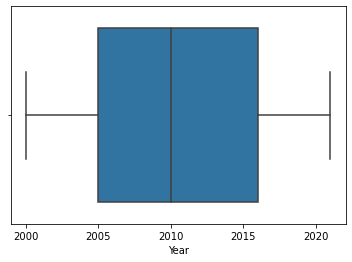

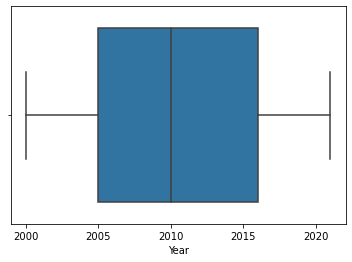

In [14]:
sns.boxplot(x = df['Year'])
plt.show()

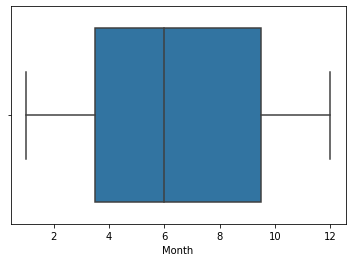

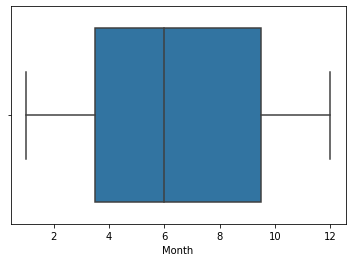

In [15]:

sns.boxplot(x = df['Month'])
plt.show()

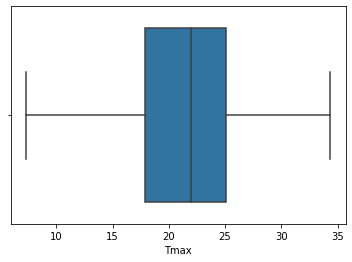

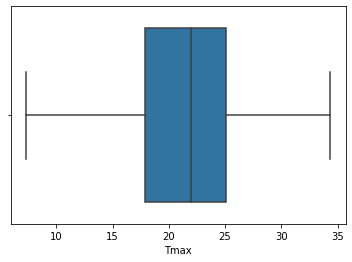

In [16]:
sns.boxplot(x = df['Tmax'])
plt.show()

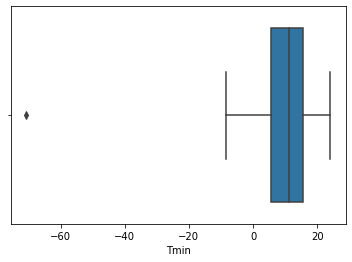

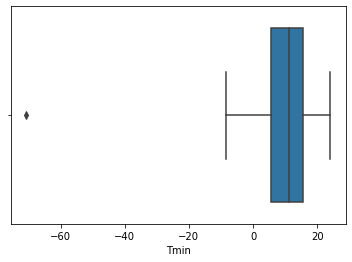

In [17]:
sns.boxplot(x = df['Tmin'])
plt.show()

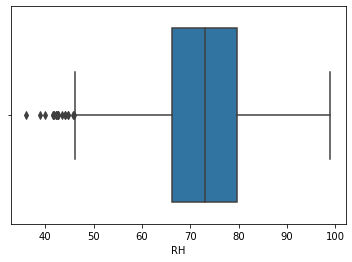

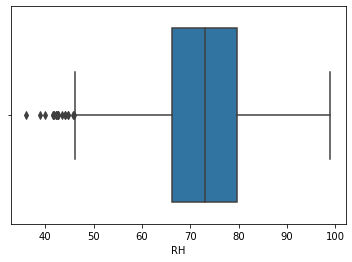

In [18]:
sns.boxplot(x = df['RH'])
plt.show()

#### Removing Outliers

In [19]:
def remove_outlier_rh(df):
    temp = pd.DataFrame()
    df_rh = df['RH']

    Q1 = df_rh.quantile(0.25)
    Q3 = df_rh.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_rh[(df_rh < (Q1 - 1.5 * IQR)) | (df_rh > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df2 = remove_outlier_rh(df)

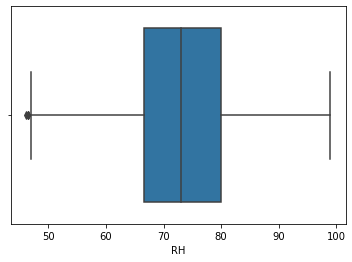

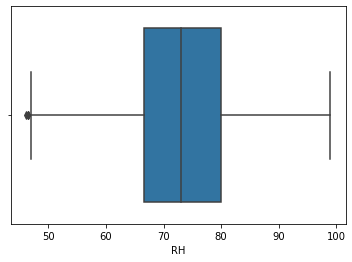

In [20]:
#After removing outlier  
sns.boxplot(x = df2['RH'])
plt.show()

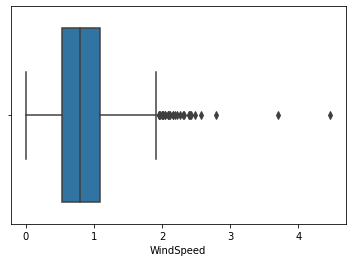

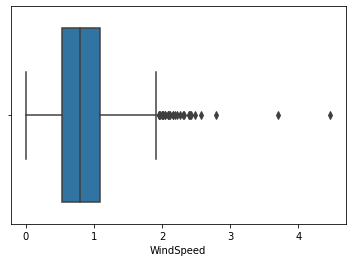

In [21]:
#before
sns.boxplot(x = df['WindSpeed'])
plt.show()

#### Removing Outliers

In [22]:
def remove_outlier_wind(df):
    temp = pd.DataFrame()
    df_wind = df['WindSpeed']

    Q1 = df_wind.quantile(0.25)
    Q3 = df_wind.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_wind[(df_wind < (Q1 - 1.5 * IQR)) | (df_wind > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df3 = remove_outlier_wind(df2)

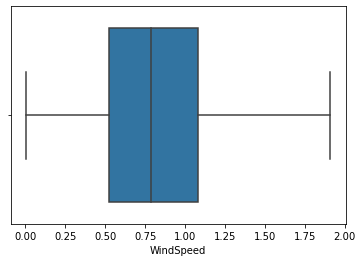

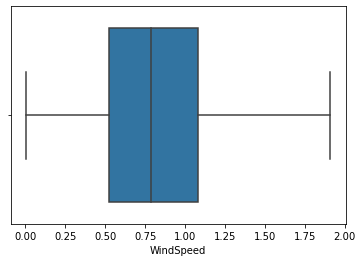

(2590, 8)

(2590, 8)

In [23]:
sns.boxplot(x = df3['WindSpeed'])
plt.show()
df3.shape

In [24]:
# df3.

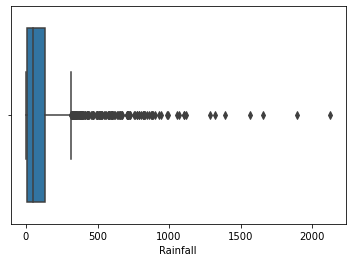

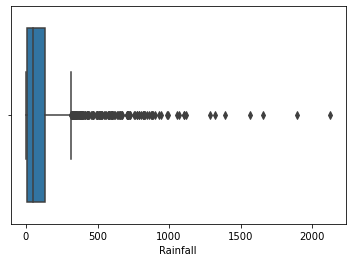

In [25]:
#before
sns.boxplot(x = df['Rainfall'])
plt.show()

#### Removing Outliers

In [26]:
def remove_outlier_Rainfall(df):
    temp = pd.DataFrame()
    df_Rainfall = df['Rainfall']

    Q1 = df_Rainfall.quantile(0.25)
    Q3 = df_Rainfall.quantile(0.75)
    IQR = Q3 - Q1
    df_outlier = df_Rainfall[(df_Rainfall < (Q1 - 1.5 * IQR)) | (df_Rainfall > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,df_outlier])
        
    return df.drop(temp.index)

df4 = remove_outlier_Rainfall(df3)

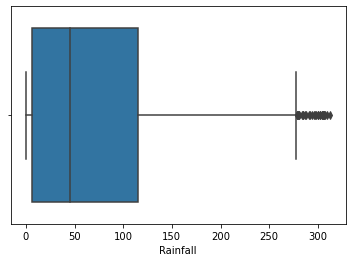

(2435, 8)

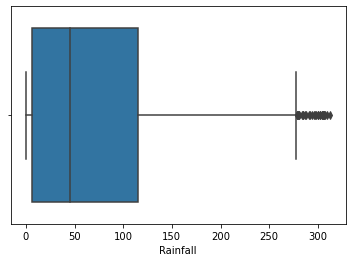

(2435, 8)

In [27]:
#after
sns.boxplot(x = df4['Rainfall'])
plt.show()
df4.shape

#### Label encoding location 

In [28]:
label_encoder = preprocessing.LabelEncoder()
df4['location'] = label_encoder.fit_transform(df4['location'])
df4.head()
df4.location.unique()

array([5, 6, 7, 9, 0, 1, 2, 3, 4, 8])

array([5, 6, 7, 9, 0, 1, 2, 3, 4, 8])

#### Feature Transformation

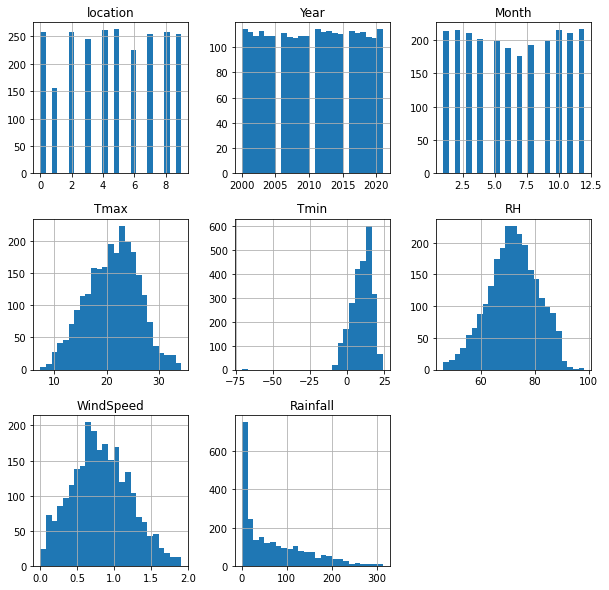

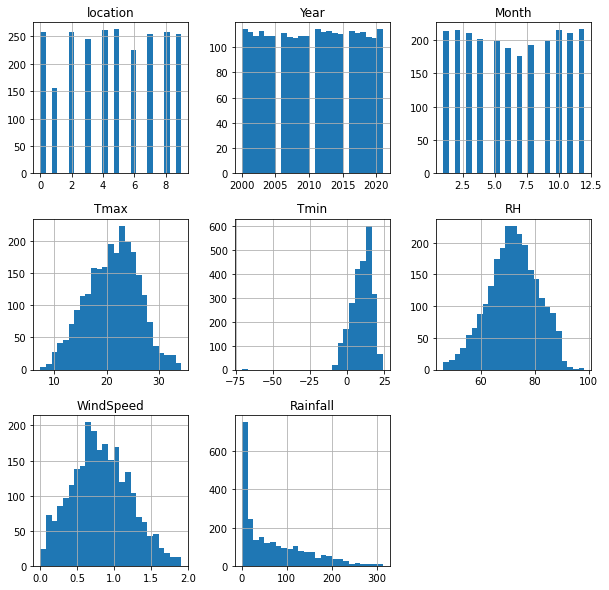

In [29]:
df4.hist(bins=25,figsize=(10,10))

plt.show()

In [30]:
df4.location

0       5
1       5
2       5
3       5
4       5
       ..
2634    8
2635    8
2636    8
2637    8
2638    8
Name: location, Length: 2435, dtype: int32

0       5
1       5
2       5
3       5
4       5
       ..
2634    8
2635    8
2636    8
2637    8
2638    8
Name: location, Length: 2435, dtype: int32

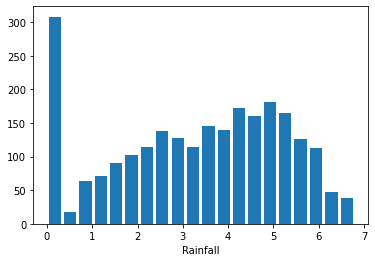

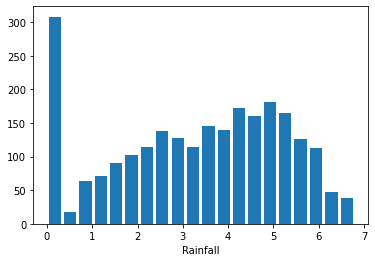

In [31]:
x=np.cbrt(df4.Rainfall)

plt.hist(x,bins=20, rwidth=0.8)
plt.xlabel("Rainfall")
plt.show()

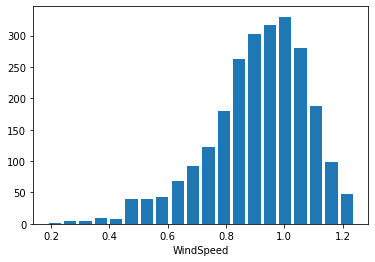

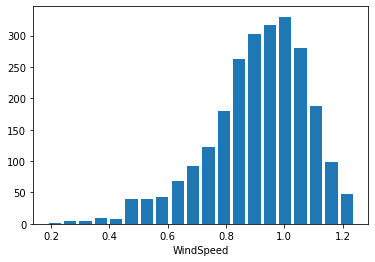

In [32]:
x=np.cbrt(df4.WindSpeed)

plt.hist(x,bins=20, rwidth=0.8)
plt.xlabel("WindSpeed")
plt.show()

#### Visualization

In [33]:
df4.corr()

,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
location,1.000000,-0.009833,0.007237,0.244738,0.122470,0.002625,-0.192069,-0.021428
Year,-0.009833,1.000000,-0.004575,0.084029,-0.033587,-0.170436,-0.142216,-0.009166
Month,0.007237,-0.004575,1.000000,0.206313,0.198885,0.124909,-0.248620,0.059312
Tmax,0.244738,0.084029,0.206313,1.000000,0.852653,0.299629,-0.230521,0.491026
Tmin,0.122470,-0.033587,0.198885,0.852653,1.000000,0.458584,-0.241526,0.620165
RH,0.002625,-0.170436,0.124909,0.299629,0.458584,1.000000,-0.258620,0.517795
WindSpeed,-0.192069,-0.142216,-0.248620,-0.230521,-0.241526,-0.258620,1.000000,-0.161591
Rainfall,-0.021428,-0.009166,0.059312,0.491026,0.620165,0.517795,-0.161591,1.000000


,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
location,1.000000,-0.009833,0.007237,0.244738,0.122470,0.002625,-0.192069,-0.021428
Year,-0.009833,1.000000,-0.004575,0.084029,-0.033587,-0.170436,-0.142216,-0.009166
Month,0.007237,-0.004575,1.000000,0.206313,0.198885,0.124909,-0.248620,0.059312
Tmax,0.244738,0.084029,0.206313,1.000000,0.852653,0.299629,-0.230521,0.491026
Tmin,0.122470,-0.033587,0.198885,0.852653,1.000000,0.458584,-0.241526,0.620165
RH,0.002625,-0.170436,0.124909,0.299629,0.458584,1.000000,-0.258620,0.517795
WindSpeed,-0.192069,-0.142216,-0.248620,-0.230521,-0.241526,-0.258620,1.000000,-0.161591
Rainfall,-0.021428,-0.009166,0.059312,0.491026,0.620165,0.517795,-0.161591,1.000000


<AxesSubplot:>

<AxesSubplot:>

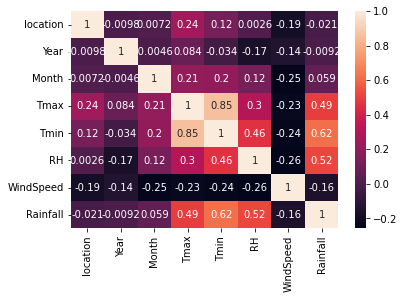

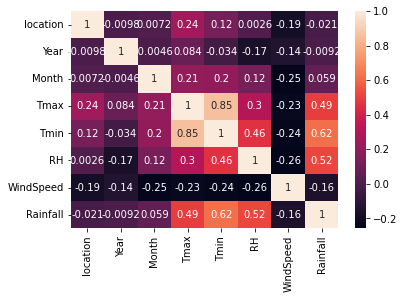

In [34]:
sns.heatmap(df4.corr(), annot=True)

### Feature Engineering 

#### Feature Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(df4)
df5 = pd.DataFrame(data=scaled_data,columns=df4.columns)
df5.head()

,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,0.131823,-1.652271,-1.557831,-2.329570,-1.497988,-0.761562,-1.456169,-0.956155
1,0.131823,-1.652271,-1.274388,-2.110319,-1.145336,-0.761562,-0.788486,-0.956155
2,0.131823,-1.652271,-0.990945,-1.332977,-0.851459,-0.323422,-0.788486,-0.804841
3,0.131823,-1.652271,-0.707502,-0.316452,-0.160848,0.552859,-1.045287,-0.634269
4,0.131823,-1.652271,-0.424059,0.261572,0.059560,0.552859,-1.507530,0.397418


,location,Year,Month,Tmax,Tmin,RH,WindSpeed,Rainfall
0,0.131823,-1.652271,-1.557831,-2.329570,-1.497988,-0.761562,-1.456169,-0.956155
1,0.131823,-1.652271,-1.274388,-2.110319,-1.145336,-0.761562,-0.788486,-0.956155
2,0.131823,-1.652271,-0.990945,-1.332977,-0.851459,-0.323422,-0.788486,-0.804841
3,0.131823,-1.652271,-0.707502,-0.316452,-0.160848,0.552859,-1.045287,-0.634269
4,0.131823,-1.652271,-0.424059,0.261572,0.059560,0.552859,-1.507530,0.397418


# Model Traning and Testing

In [36]:
X=df5[['location','Year','Month','Tmax','Tmin','RH', 'WindSpeed']]
y=df5['Rainfall']
df5.dtypes

location     float64
Year         float64
Month        float64
Tmax         float64
Tmin         float64
RH           float64
WindSpeed    float64
Rainfall     float64
dtype: object

location     float64
Year         float64
Month        float64
Tmax         float64
Tmin         float64
RH           float64
WindSpeed    float64
Rainfall     float64
dtype: object

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5, shuffle=True)

In [38]:
X_train.count()

location     1826
Year         1826
Month        1826
Tmax         1826
Tmin         1826
RH           1826
WindSpeed    1826
dtype: int64

location     1826
Year         1826
Month        1826
Tmax         1826
Tmin         1826
RH           1826
WindSpeed    1826
dtype: int64

In [39]:
X_test.count()

location     609
Year         609
Month        609
Tmax         609
Tmin         609
RH           609
WindSpeed    609
dtype: int64

location     609
Year         609
Month        609
Tmax         609
Tmin         609
RH           609
WindSpeed    609
dtype: int64

In [40]:
y_train.count()

1826

1826

In [41]:
y_test.count()

609

609

#### Linear Regression 

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [43]:
model.fit(X_train, y_train)

LinearRegression()

LinearRegression()

In [44]:
model.score(X_train,y_train) 

0.4633283514334373

0.4633283514334373

In [45]:
model.score(X_test,y_test) 

0.4842880092962376

0.4842880092962376

#### Decision Tree Algorithem

In [46]:
from sklearn.tree import DecisionTreeRegressor
model_decision = DecisionTreeRegressor(max_depth=6)
model_decision.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6)

DecisionTreeRegressor(max_depth=6)

In [47]:
y_pred=model_decision.predict(X_test)

In [48]:
y_train_predicted = model_decision.predict(X_train)
y_test_predicted = model_decision.predict(X_test)
print("Train set accuracy: ",r2_score(y_train,y_train_predicted))
print("Test set accuracy : ",r2_score(y_test,y_test_predicted))
print("MSE:",mean_squared_error(y_test,y_test_predicted))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

Train set accuracy:  0.7025907535167996
Test set accuracy :  0.614152059093592
MSE: 0.3958423721953649
RMSE:  0.6291600529240273
Train set accuracy:  0.7025907535167996
Test set accuracy :  0.614152059093592
MSE: 0.3958423721953649
RMSE:  0.6291600529240273


In [49]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result.head(10)

,Actual,Predicted
2239,1.214513,0.887855
437,-0.320636,0.074431
1277,-0.147313,-0.790168
824,-0.726433,-0.571170
1745,2.072877,1.537606
687,-0.956155,-0.842386
1723,0.518469,0.932290
1476,-0.367406,0.731635
1235,-0.019384,0.019933
1467,1.023308,1.378671


,Actual,Predicted
2239,1.214513,0.887855
437,-0.320636,0.074431
1277,-0.147313,-0.790168
824,-0.726433,-0.571170
1745,2.072877,1.537606
687,-0.956155,-0.842386
1723,0.518469,0.932290
1476,-0.367406,0.731635
1235,-0.019384,0.019933
1467,1.023308,1.378671


### KNN Algorithm

In [50]:
from sklearn.neighbors import KNeighborsRegressor
model_KNNR = KNeighborsRegressor(3)
model_KNNR.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

KNeighborsRegressor(n_neighbors=3)

In [51]:
y1_pred = model_KNNR.predict(X_test)

In [52]:
y_train_predicted = model_KNNR.predict(X_train)
y_test_predicted = model_KNNR.predict(X_test)

print("Train set accuracy: ",r2_score(y_train,y_train_predicted))

print("Test set accuracy : ",r2_score(y_test,y_test_predicted))

print("MSE:",mean_squared_error(y_test,y_test_predicted))

print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_test_predicted))) 

Train set accuracy:  0.7995501426530254
Test set accuracy :  0.6199653602191221
MSE: 0.389878491962105
RMSE:  0.6244025079723055
Train set accuracy:  0.7995501426530254
Test set accuracy :  0.6199653602191221
MSE: 0.389878491962105
RMSE:  0.6244025079723055


In [53]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y1_pred})
result.head(10)

,Actual,Predicted
2239,1.214513,1.396549
437,-0.320636,-0.449941
1277,-0.147313,-0.437560
824,-0.726433,-0.694336
1745,2.072877,1.026976
687,-0.956155,-0.923599
1723,0.518469,0.493709
1476,-0.367406,-0.393542
1235,-0.019384,0.308005
1467,1.023308,1.460284


,Actual,Predicted
2239,1.214513,1.396549
437,-0.320636,-0.449941
1277,-0.147313,-0.437560
824,-0.726433,-0.694336
1745,2.072877,1.026976
687,-0.956155,-0.923599
1723,0.518469,0.493709
1476,-0.367406,-0.393542
1235,-0.019384,0.308005
1467,1.023308,1.460284


## Using Pipeline

In [54]:
numeric_cols = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(numeric_cols)



Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'WindSpeed'], dtype='object')
Index(['location', 'Year', 'Month', 'Tmax', 'Tmin', 'RH', 'WindSpeed'], dtype='object')


In [55]:
n_index = [X.columns.get_loc(col) for col in numeric_cols]
n_index

[0, 1, 2, 3, 4, 5, 6]

[0, 1, 2, 3, 4, 5, 6]

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler

In [57]:
numeric_transformer = Pipeline(steps = [
    ('imputerN',SimpleImputer(strategy='median')), 
    ('scaler',StandardScaler()) 
] )


In [58]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers = [
                ('numerical',numeric_transformer,n_index),
                
])

In [59]:

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 5)

In [60]:
#from sklearn.tree import DecisionTreeRegressor
#model= DecisionTreeRegressor(max_depth =7)

In [61]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression() 

In [62]:
#from sklearn.svm import SVR
#model = SVR() 

In [63]:
pipelinemodel = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('est', model)  #Model
    ]
)

In [64]:
from sklearn import set_config
set_config(display='diagram')
#fit data
pipelinemodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('est', KNeighborsRegressor())])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('est', KNeighborsRegressor())])

## Model Evaluation

In [65]:
pipelinemodel.score(X_train,y_train) 

0.7505615146661546

0.7505615146661546

In [66]:
pipelinemodel.score(X_test,y_test) 

0.6386808636174764

0.6386808636174764

In [67]:
y2_pred = pipelinemodel.predict(X_test)

In [68]:
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y2_pred)
print("r2: {}".format(lin_r2))

r2: 0.6386808636174764
r2: 0.6386808636174764


In [69]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y2_pred, y_test)
lin_mse = np.sqrt(lin_mse)
print("mse: {}".format(lin_mse))

mse: 0.6088334829774628
mse: 0.6088334829774628


In [70]:
result = pd.DataFrame({'Actual':y_test,'Predicted':y2_pred})
result.head(10)

,Actual,Predicted
2239,1.214513,1.390038
437,-0.320636,-0.400145
1277,-0.147313,-0.040843
824,-0.726433,-0.480203
1745,2.072877,1.092912
687,-0.956155,-0.936621
1723,0.518469,0.460695
1476,-0.367406,-0.262586
1235,-0.019384,0.282419
1467,1.023308,1.406270


,Actual,Predicted
2239,1.214513,1.390038
437,-0.320636,-0.400145
1277,-0.147313,-0.040843
824,-0.726433,-0.480203
1745,2.072877,1.092912
687,-0.956155,-0.936621
1723,0.518469,0.460695
1476,-0.367406,-0.262586
1235,-0.019384,0.282419
1467,1.023308,1.406270


In [71]:
import pickle
pickle.dump(pipelinemodel, open("model.pickle", "wb"))

In [72]:
model = pickle.load(open("model.pickle","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('est', KNeighborsRegressor())])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputerN',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('est', KNeighborsRegressor())])